In [1]:
# Let's classify IMBD movie reviews into positive and negative interviews using LSTMs in Keras

In [2]:
from keras.layers import LSTM, Embedding
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input, Bidirectional
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
print('Loading data...')
max_words = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words) # , skip_top=10)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
# monitor the loss, if the loss climbs instead of going down we stop the training
early_stopping=EarlyStopping(monitor='val_loss', patience=6)

In [5]:
print('Pad sequences (samples x time)')
maxlen = 400
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)


In [50]:
batch_size = 124
epochs = 10

print('Build model...')
model = Sequential()
model.add(Embedding(max_words, 50))  # 1000
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

Build model...


In [51]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    # validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 243s - loss: 0.5208 - acc: 0.7327 - val_loss: 0.3878 - val_acc: 0.8412
Epoch 2/10
22500/22500 [==============================] - 243s - loss: 0.3518 - acc: 0.8537 - val_loss: 0.3550 - val_acc: 0.8480
Epoch 3/10
22500/22500 [==============================] - 236s - loss: 0.3051 - acc: 0.8784 - val_loss: 0.3467 - val_acc: 0.8496
Epoch 4/10
22500/22500 [==============================] - 244s - loss: 0.3178 - acc: 0.8740 - val_loss: 0.3370 - val_acc: 0.8588
Epoch 5/10
22500/22500 [==============================] - 241s - loss: 0.3120 - acc: 0.8752 - val_loss: 0.3404 - val_acc: 0.8640
Epoch 6/10
16120/22500 [====================>.........] - ETA: 147s - loss: 0.2789 - acc: 0.8888

KeyboardInterrupt: 

In [ ]:
# inspect the model

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(hist):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('loss.png', dpi=400)
    
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('accuracy.png', dpi=400)
        
plot_history(history)

In [ ]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
# now let's use CNNs for this task
# the training time is much faster

In [6]:
from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Activation
from keras.layers import Convolution1D, GlobalMaxPooling1D

batch_size = 124
epochs = 10

max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
nb_filter = 250
filter_length = 3
hidden_dims = 250
nb_epoch = 4

model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen, dropout=0.2))


model.add(
    Convolution1D(
        nb_filter=nb_filter,
        filter_length=filter_length,
        border_mode='valid',
        activation='relu',
        subsample_length=1,
    )
)

model.add(GlobalMaxPooling1D())

model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))



J:\Anaconda_Python3_6\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
J:\Anaconda_Python3_6\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", padding="valid", kernel_size=3, strides=1, filters=250)`


In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1,
                    # validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 6s - loss: 0.3873 - acc: 0.8140 - val_loss: 0.2828 - val_acc: 0.8920
Epoch 2/10
22500/22500 [==============================] - 4s - loss: 0.2037 - acc: 0.9207 - val_loss: 0.2712 - val_acc: 0.8980
Epoch 3/10
22500/22500 [==============================] - 5s - loss: 0.1088 - acc: 0.9623 - val_loss: 0.3083 - val_acc: 0.8916
Epoch 4/10
22500/22500 [==============================] - 5s - loss: 0.0487 - acc: 0.9841 - val_loss: 0.3992 - val_acc: 0.8940
Epoch 5/10
22500/22500 [==============================] - 5s - loss: 0.0196 - acc: 0.9941 - val_loss: 0.4757 - val_acc: 0.8868
Epoch 6/10
22500/22500 [==============================] - 5s - loss: 0.0100 - acc: 0.9971 - val_loss: 0.5154 - val_acc: 0.8932
Epoch 7/10
22500/22500 [==============================] - 4s - loss: 0.0172 - acc: 0.9944 - val_loss: 0.6453 - val_acc: 0.8748
Epoch 8/10
22500/22500 [==============================] - 4s -

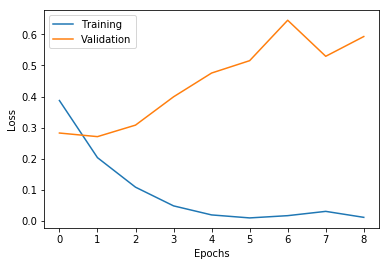

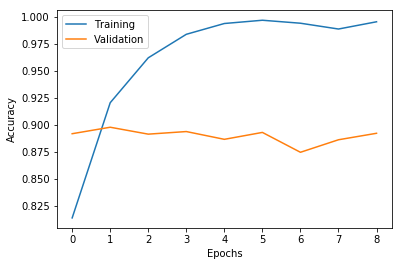

In [9]:
# inspect the model

from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(hist):
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('loss.png', dpi=400)
    
    plt.figure()
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.legend(['Training', 'Validation'])
    # plt.savefig('accuracy.png', dpi=400)
        
plot_history(history)

In [10]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

24448/25000 [============================>.] - ETA: 0sTest score: 0.603188763783
Test accuracy: 0.88472


In [ ]:
# Resources:
# http://www.samyzaf.com/ML/imdb/imdb.html
# https://medium.com/@thoszymkowiak/how-to-implement-sentiment-analysis-using-word-embedding-and-convolutional-neural-networks-on-keras-163197aef623